In [1]:
import numpy as np 
import pandas as pd

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/Finance/main/dataset/Data%20Professionals%20Salary%20-%202022/Salary%20Dataset.csv")
df.head()

,Company Name,Job Title,Salaries Reported,Location,Salary
0,Mu Sigma,Data Scientist,105.0,Bangalore,"₹6,48,573/yr"
1,IBM,Data Scientist,95.0,Bangalore,"₹11,91,950/yr"
2,Tata Consultancy Services,Data Scientist,66.0,Bangalore,"₹8,36,874/yr"
3,Impact Analytics,Data Scientist,40.0,Bangalore,"₹6,69,578/yr"
4,Accenture,Data Scientist,32.0,Bangalore,"₹9,44,110/yr"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4344 entries, 0 to 4343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company Name       4341 non-null   object 
 1   Job Title          4344 non-null   object 
 2   Salaries Reported  4342 non-null   float64
 3   Location           4344 non-null   object 
 4   Salary             4344 non-null   object 
dtypes: float64(1), object(4)
memory usage: 169.8+ KB


In [5]:
df=df.dropna()

In [6]:
df["Job Title"].unique()

array(['Data Scientist', 'Data Science Associate',
       'Data Science Consultant', 'Data Science', 'Senior Data Scientist',
       'Junior Data Scientist', 'Lead Data Scientist',
       'Data Science Manager', 'Data Scientist - Trainee',
       'Data Science Lead', 'Data Analyst', 'Data Engineer',
       'Machine Learning Engineer', 'Machine Learning Software Engineer',
       'Software Engineer - Machine Learning',
       'Machine Learning Consultant', 'Machine Learning Data Associate',
       'Machine Learning Data Associate I', 'Machine Learning Associate',
       'Machine Learning Data Associate II',
       'Associate Machine Learning Engineer',
       'Machine Learning Data Analyst',
       'Senior Machine Learning Engineer', 'Machine Learning Scientist',
       'Machine Learning Developer'], dtype=object)

In [7]:
df["Job Title"].replace({"Software Engineer - Machine Learning": "Machine Learning Software Engineer"}, inplace=True)
df["Job Title"].replace({"Machine Learning Data Associate": "Machine Learning Associate","Associate Machine Learning Engineer":"Machine Learning Associate"}, inplace=True)
df["Job Title"].replace({"Data Science": "Data Scientist"}, inplace=True)
df["Job Title"].unique()

array(['Data Scientist', 'Data Science Associate',
       'Data Science Consultant', 'Senior Data Scientist',
       'Junior Data Scientist', 'Lead Data Scientist',
       'Data Science Manager', 'Data Scientist - Trainee',
       'Data Science Lead', 'Data Analyst', 'Data Engineer',
       'Machine Learning Engineer', 'Machine Learning Software Engineer',
       'Machine Learning Consultant', 'Machine Learning Associate',
       'Machine Learning Data Associate I',
       'Machine Learning Data Associate II',
       'Machine Learning Data Analyst',
       'Senior Machine Learning Engineer', 'Machine Learning Scientist',
       'Machine Learning Developer'], dtype=object)

In [8]:
df["Company Name"].unique()

array(['Mu Sigma', 'IBM', 'Tata Consultancy Services', ...,
       'Myraa Technologies', 'TaiyōAI', 'Market Pulse Technologies'],
      dtype=object)

In [9]:
df["Location"].unique()

array(['Bangalore', 'Pune', 'Hyderabad', 'New Delhi', 'Mumbai'],
      dtype=object)

In [10]:
df["Salary"]

0        ₹6,48,573/yr
1       ₹11,91,950/yr
2        ₹8,36,874/yr
3        ₹6,69,578/yr
4        ₹9,44,110/yr
            ...      
4339        ₹5,180/mo
4340     ₹7,51,286/yr
4341     ₹4,10,952/yr
4342    ₹16,12,324/yr
4343     ₹9,39,843/yr
Name: Salary, Length: 4339, dtype: object

In [11]:
df[['Salary', 'Duration']] = df['Salary'].str.split('/', 1, expand=True)
df["Duration"].unique()

array(['yr', 'mo', 'hr'], dtype=object)

In [12]:
import re
df["Salary"]=df["Salary"].map(lambda x: re.sub(r'\W+', '', x))
df["Salary"]=pd.to_numeric(df["Salary"], errors='coerce')
df["Salary"]

0        648573.0
1       1191950.0
2        836874.0
3        669578.0
4        944110.0
          ...    
4339       5180.0
4340     751286.0
4341     410952.0
4342    1612324.0
4343     939843.0
Name: Salary, Length: 4339, dtype: float64

In [13]:
df["Salaries Reported"].unique()

array([105.,  95.,  66.,  40.,  32.,  30.,  28.,  26.,  25.,  22.,  20.,
        19.,  18.,  16.,  15.,  14.,  13.,  12.,  11.,  10.,   9.,   8.,
         7.,   6.,   5.,   4.,   3.,   2.,   1.,  17.,  23.,  27.,  21.,
        62.,  48.,  45.,  44.,  41.,  31.,  24.,  35.,  29.,  86.,  49.,
        36.,  46.,  33.,  38.,  81.])

2.777137589306292

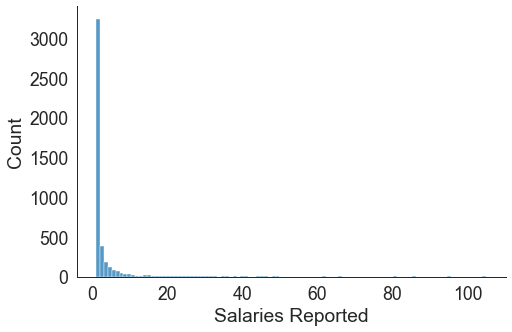

In [14]:
import seaborn as sns
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=df, x="Salaries Reported", kind="hist", bins = 100, aspect = 1.5)
df["Salaries Reported"].mean()

In [15]:
df.head()

,Company Name,Job Title,Salaries Reported,Location,Salary,Duration
0,Mu Sigma,Data Scientist,105.0,Bangalore,648573.0,yr
1,IBM,Data Scientist,95.0,Bangalore,1191950.0,yr
2,Tata Consultancy Services,Data Scientist,66.0,Bangalore,836874.0,yr
3,Impact Analytics,Data Scientist,40.0,Bangalore,669578.0,yr
4,Accenture,Data Scientist,32.0,Bangalore,944110.0,yr


<AxesSubplot:xlabel='Company Name'>

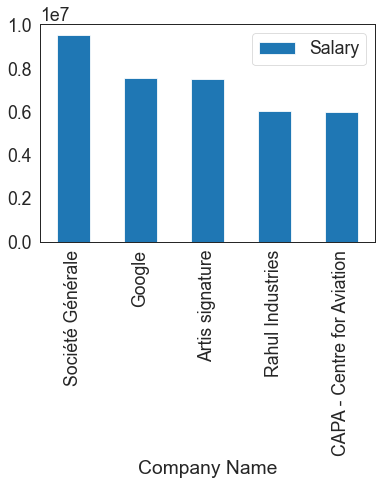

In [17]:
sal_per_year = df.copy()
sal_per_year = sal_per_year[sal_per_year['Duration'] == "yr"]
sal_per_year = sal_per_year.sort_values(by=['Salary'], ascending=False)
sal_per_year[:5].plot.bar(x='Company Name', y='Salary')